## Optimizing the Barrier Placement to counteract erosion
### This script demonstrates optimizing the placement of the barriers, and the before and after, based on the 2D Simulator.

In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from simulation import simulation
from optimization import OptimizationManager
from config import (
    WAVE_FREQ, WAVE_SPEED, WAVE_DECAY, WAVE_CUTOFF, WAVE_RETREAT_COEFF, WAVE_HEIGHT,
    SAND_PULL, GROUND_PULL, WATER_DECAY, WAVE_VOL, WAVE_AMPLITUDE, WAVE_SPREAD,
    DIM_MAP, OBSTACLE_COORDS
)

First, we set up the simulation.

In [3]:
# Sim parameters
SIM_PARAMS = {
    "wave_freq": WAVE_FREQ,
    "wave_speed": WAVE_SPEED,
    "wave_decay": WAVE_DECAY,
    "wave_cutoff": WAVE_CUTOFF,
    "wave_retreat_coeff": WAVE_RETREAT_COEFF,
    "wave_height": WAVE_HEIGHT,
    "sand_pull": SAND_PULL,
    "ground_pull": GROUND_PULL,
    "water_decay": WATER_DECAY,
    "wave_vol": WAVE_VOL,
    "wave_amplitude": WAVE_AMPLITUDE,
    "wave_spread": WAVE_SPREAD,
    "dim_map": DIM_MAP
}

Some helper functions to visualize the results of the optimized placement of barriers

In [4]:
# Helper function for erosion heatmap
def plot_erosion_heatmap(before_map, after_map, title, cmap='Reds'):
    sand_before = before_map[:, :, 1]  # Sand layer before erosion
    sand_after = after_map[:, :, 1]    # Sand layer after erosion
    erosion_diff = sand_before - sand_after  # Difference in sand levels

    plt.imshow(erosion_diff, cmap=cmap)
    plt.colorbar(label="Erosion Intensity")
    plt.title(title)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")

# Helper function for numerical erosion values
def calculate_total_erosion(before_map, after_map):
    sand_before = before_map[:, :, 1]
    sand_after = after_map[:, :, 1]
    total_erosion = np.sum(sand_before - sand_after)
    return total_erosion

Then we run the simulation first without any barriers, then with randomly placed barriers, and eventually we run an optimization using Bayesian Opt. to obtain optimal coordinates of the barriers and use that to generate final simulation results.

In [5]:
# 1. Run simulation without barriers
print("\nRunning simulation without barriers...")
sim_no_barrier = simulation(**SIM_PARAMS, obstacle_coords=[])
before_map_no_barrier, after_map_no_barrier, _, _ = sim_no_barrier.run_sim(num_timesteps=100)

# 2. Run simulation with non-optimized barriers
print("\nRunning simulation with non-optimized barriers...")
sim_non_optimized = simulation(**SIM_PARAMS, obstacle_coords=OBSTACLE_COORDS)
before_map_non_optimized, after_map_non_optimized, _, _ = sim_non_optimized.run_sim(num_timesteps=100)

# 3. Optimize barrier placement
print("\nOptimizing barrier placement...")
def run_optimization(num_timesteps=100, n_samples=10, n_iterations=20):
    opt_manager = OptimizationManager()
    param_samples = opt_manager.sample_parameters(n_samples)
    
    # Run initial simulations
    outcomes = []
    for params in param_samples:
        outcomes.append(opt_manager.wrapped_run_sim(params))
    
    # Convert results to numpy arrays
    X = np.array(param_samples)
    Y = np.array(outcomes).reshape(-1, 1)
    
    # Run Bayesian optimization
    loop_state = opt_manager.run_optimization(X, Y, n_iterations=n_iterations)
    
    # Extract the best parameters
    best_parameters = loop_state.X[-1]
    return [(best_parameters[i], best_parameters[len(OBSTACLE_COORDS) + i]) for i in range(len(OBSTACLE_COORDS))]

optimized_coords = run_optimization()
print(f"Optimized barrier coordinates: {optimized_coords}")

# 4. Run simulation with optimized barriers
print("\nRunning simulation with optimized barriers...")
sim_optimized = simulation(**SIM_PARAMS, obstacle_coords=optimized_coords)
before_map_optimized, after_map_optimized, _, _ = sim_optimized.run_sim(num_timesteps=100)


Running simulation without barriers...


  0%|          | 0/99 [00:00<?, ?it/s]


Running simulation with non-optimized barriers...


  0%|          | 0/99 [00:00<?, ?it/s]


Optimizing barrier placement...


  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

Optimized barrier coordinates: [(4.448817524546456, 22.025468602103683)]

Running simulation with optimized barriers...


  0%|          | 0/99 [00:00<?, ?it/s]


Erosion Summary:
Total erosion (no barriers): 200.00
Total erosion (non-optimized barriers): 200.00
Total erosion (optimized barriers): 200.00


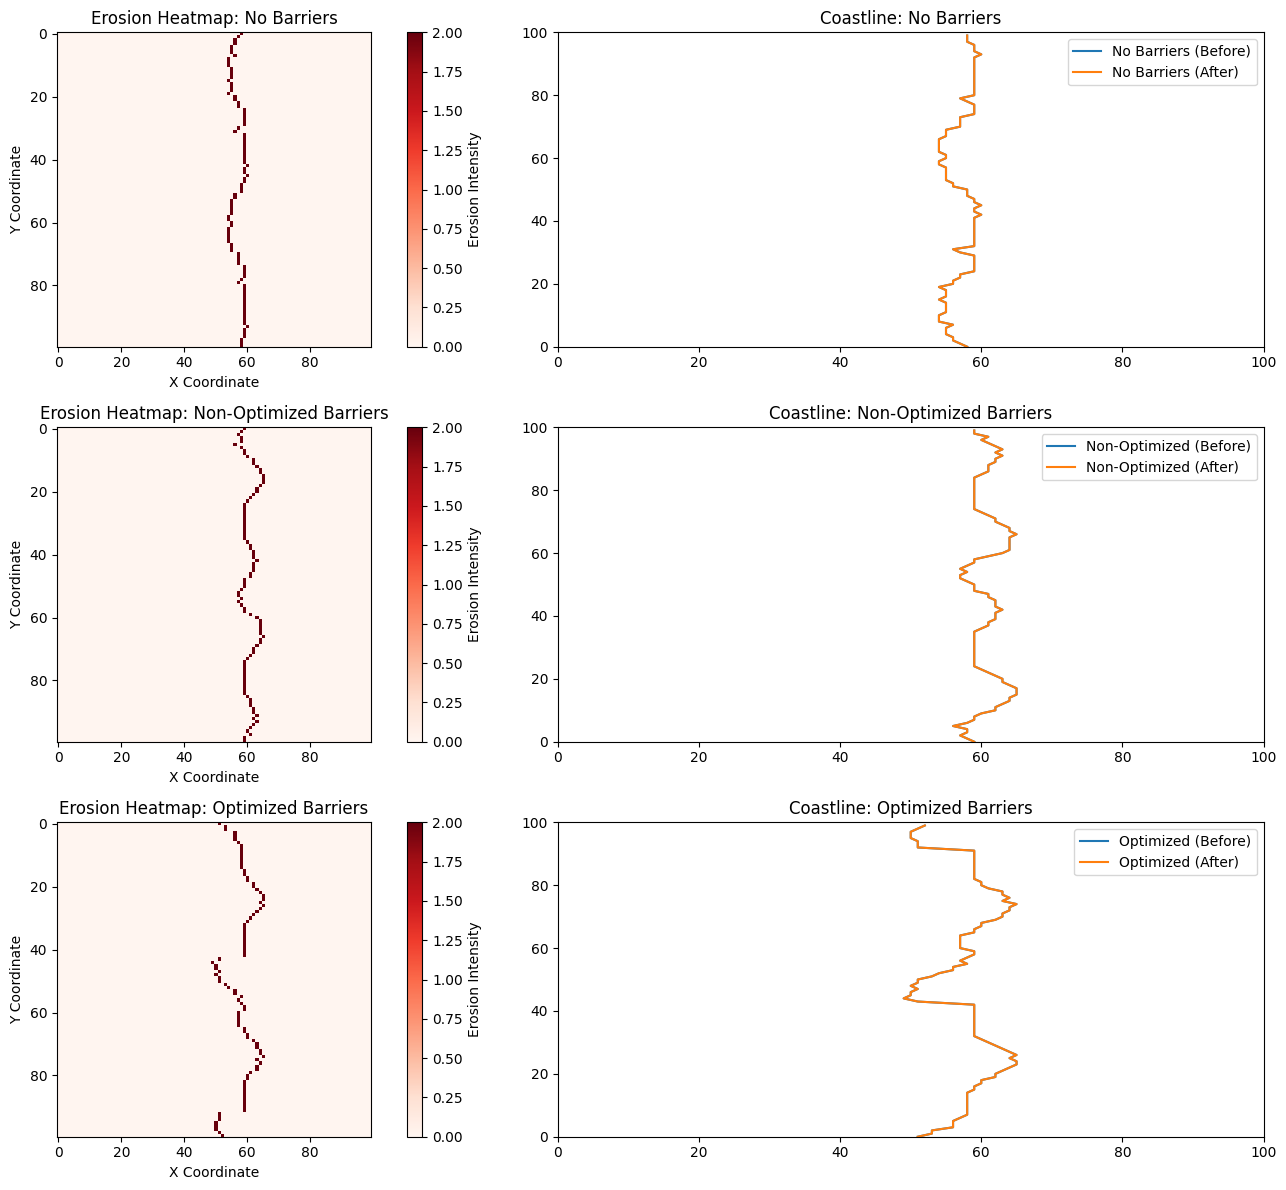

In [6]:
# 5. Visualization
plt.figure(figsize=(15, 12))

# Heatmap for no barriers
plt.subplot(3, 2, 1)
plot_erosion_heatmap(before_map_no_barrier, after_map_no_barrier, "Erosion Heatmap: No Barriers")

# Heatmap for non-optimized barriers
plt.subplot(3, 2, 3)
plot_erosion_heatmap(before_map_non_optimized, after_map_non_optimized, "Erosion Heatmap: Non-Optimized Barriers")

# Heatmap for optimized barriers
plt.subplot(3, 2, 5)
plot_erosion_heatmap(before_map_optimized, after_map_optimized, "Erosion Heatmap: Optimized Barriers")

# Numerical summary
erosion_no_barrier = calculate_total_erosion(before_map_no_barrier, after_map_no_barrier)
erosion_non_optimized = calculate_total_erosion(before_map_non_optimized, after_map_non_optimized)
erosion_optimized = calculate_total_erosion(before_map_optimized, after_map_optimized)

print("\nErosion Summary:")
print(f"Total erosion (no barriers): {erosion_no_barrier:.2f}")
print(f"Total erosion (non-optimized barriers): {erosion_non_optimized:.2f}")
print(f"Total erosion (optimized barriers): {erosion_optimized:.2f}")

# Coastline comparison
def plot_coast(sim, before_map, after_map, label_before, label_after):
    coords_before = sim.get_coast_coords(before_map, limit=0)
    coords_after = sim.get_coast_coords(after_map, limit=0)
    sim.plot_coast(coords_before, label=label_before)
    sim.plot_coast(coords_after, label=label_after)

plt.subplot(3, 2, 2)
plot_coast(sim_no_barrier, before_map_no_barrier, after_map_no_barrier, "No Barriers (Before)", "No Barriers (After)")
plt.title("Coastline: No Barriers")
plt.legend()

plt.subplot(3, 2, 4)
plot_coast(sim_non_optimized, before_map_non_optimized, after_map_non_optimized, "Non-Optimized (Before)", "Non-Optimized (After)")
plt.title("Coastline: Non-Optimized Barriers")
plt.legend()

plt.subplot(3, 2, 6)
plot_coast(sim_optimized, before_map_optimized, after_map_optimized, "Optimized (Before)", "Optimized (After)")
plt.title("Coastline: Optimized Barriers")
plt.legend()

plt.tight_layout()
plt.show()
